C:\Users\Lorenzo\anaconda3\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
C:\Users\Lorenzo\anaconda3\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


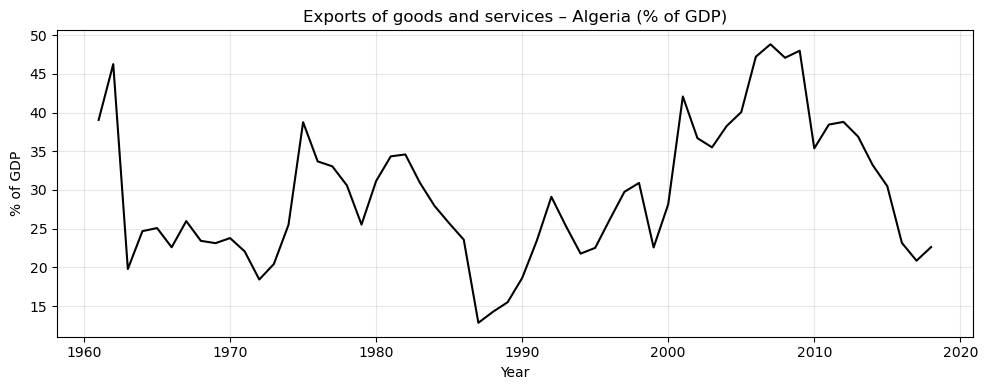

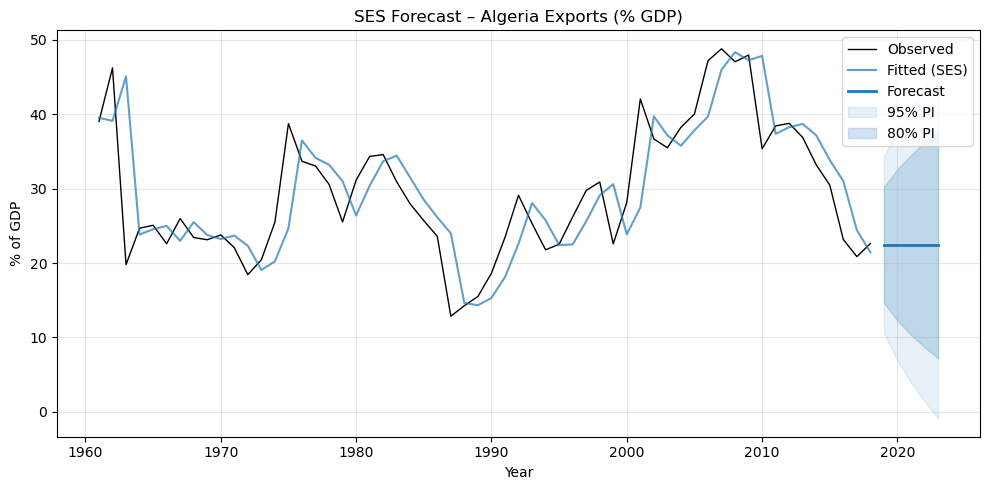

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.models import AutoETS

# 1) Cargar datos
df = pd.read_csv("algeria_exports.csv", parse_dates=["ds"])

# 2) Filtrar solo Argelia
algeria = (
    df[df["unique_id"] == "Algeria"]
    .sort_values("ds")
    .reset_index(drop=True)
)

# 3) Formato estándar para StatsForecast
algeria["unique_id"] = "Algeria"   # por si no existe la columna
sf = StatsForecast(
    models=[AutoETS(season_length=1, model="ANN", alias="SES")], # ETS(A,N,N)
    freq="Y"
)

# 4) Ajustar y predecir 5 años con intervalos 80% y 95%
fc = sf.forecast(df=algeria, h=5, level=[80,95], fitted=True)
fitted_vals = sf.forecast_fitted_values()

# 5) Gráfico 1: Serie original (Fig 8.1)
plt.figure(figsize=(10,4))
plt.plot(algeria["ds"], algeria["y"], color='black')
plt.title("Exports of goods and services – Algeria (% of GDP)")
plt.xlabel("Year"); plt.ylabel("% of GDP")
plt.grid(alpha=0.3); plt.tight_layout()
plt.show()

# 6) Gráfico 2: Ajuste + Forecast + Intervalos (Fig 8.2)
plt.figure(figsize=(10,5))
plt.plot(algeria["ds"], algeria["y"], label="Observed", color='black', lw=1)
plt.plot(fitted_vals["ds"], fitted_vals["SES"], label="Fitted (SES)", color='C0', alpha=0.7)
plt.plot(fc["ds"], fc["SES"], label="Forecast", color='C0', lw=2)

plt.fill_between(fc["ds"], fc["SES-lo-95"], fc["SES-hi-95"], color='C0', alpha=0.1, label="95% PI")
plt.fill_between(fc["ds"], fc["SES-lo-80"], fc["SES-hi-80"], color='C0', alpha=0.2, label="80% PI")

plt.title("SES Forecast – Algeria Exports (% GDP)")
plt.xlabel("Year"); plt.ylabel("% of GDP")
plt.legend(); plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()
